# Primjena strojnog učenja u predviđanju ponašanja potrošača - praktični dio

Ovaj dokument sadrži praktični dio završnog rada "Primjena strojnog učenja u predviđanju ponašanja potrošača". Dokument je pisan u obliku IPython bilježnice (.*ipynb* format) unutar Jupyter Notebook okružja.

U nastavku se nalazi programski kod kojim su postignuti rezultati iz pismenog dijela rada. Svi ispisi, slike, tabele i dijagrami kreirani su programski od strane autora. Dokument je organiziran tako da prema naslovima prati poglavlje 4 iz pismenog dijela rada.

*Python* kod nalazi se u isječcima koji su označeni sa "**In [broj]:**" oznakom, dok se pripadajući rezultat isječka nalazi odmah ispod te je označen "**Out [broj]:**" oznakom. Iznad svakog isječka nalazi se kratki opis korištenih metoda/klasa ili opis postupka izvođenja.


## 4.1 Početna analiza podataka

Sljedeći kod učitava _Pandas_ modul i skup podataka sa diska (*'BlackFriday.csv'* file) te ga pretvara u objekt tipa _Data Frame_ za daljnu upotrebu. Zatim slijedi prikaz uzorka skupa podataka.

In [1]:
import pandas as pd

skup_podataka = pd.read_csv('BlackFriday.csv')

skup_podataka.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Prikaz inforamcija o skupu podataka dobiven *Pandas* metodom *info()*, zatim ispis detalja za svaki stupac skupa. Za svaki stupac ispisan je broj jedinstvenih redaka i broj jedinstvenih vrijednosti ako je riječ o kategoričkoj vrijednosti. Za stupac *Purchase* prikazan je medijan iznosa kupnje.

In [2]:
skup_podataka.info()

print('\nBroj jedinstvenih kupaca: ', len(skup_podataka['User_ID'].unique()),'\n')
print('Broj jedinstvenih proizvoda: ', len(skup_podataka['Product_ID'].unique()),'\n')
print('Broj jedinstvenih spolova: ', len(skup_podataka['Gender'].unique()))
print('\tJedinstveni spolovi: ', skup_podataka['Gender'].unique(),'\n')
print('Broj jedinstvenih kategorija godina: ', len(skup_podataka['Age'].unique()))
print('\tJedinstvene kategorija godina: ', skup_podataka['Age'].unique(), '\n')
print('Broj jedinstvenih kategorija zanimanja: ', len(skup_podataka['Occupation'].unique()))
print('\tJedinstvene kategorije zanimanja: ', skup_podataka['Occupation'].unique(), '\n')
print('Broj jedinstvenih kategorija gradova: ', len(skup_podataka['City_Category'].unique()))
print('\tJedinstvene kategorije gradova: ', skup_podataka['City_Category'].unique(), '\n')
print('Broj jedinstvenih godina življenja na trenutnoj lokaciji: ', len(skup_podataka['Stay_In_Current_City_Years'].unique()))
print('\tJedinstvene godine življenja na trenutnoj lokaciji: ', skup_podataka['Stay_In_Current_City_Years'].unique(), '\n')
print('Broj jedinstvenih kategorija bračnog stanja: ', len(skup_podataka['Marital_Status'].unique()))
print('\tJedinstvene kategorije bračnog stanja: ', skup_podataka['Marital_Status'].unique(), '\n')
print('Broj jedinstvenih prvih kategorija proizvoda: ', len(skup_podataka['Product_Category_1'].unique()))
print('\tJedinstvene kategorije prvih kategorija proizvoda: ', skup_podataka['Product_Category_1'].unique(), '\n')
print('Broj jedinstvenih drugih kategorija proizvoda: ', len(skup_podataka['Product_Category_2'].unique()))
print('\tJedinstvene kategorije drugih kategorija proizvoda: ', skup_podataka['Product_Category_2'].unique(), '\n')
print('Broj jedinstvenih trećih kategorija proizvoda: ', len(skup_podataka['Product_Category_3'].unique()))
print('\tJedinstvene kategorije trećih kategorija proizvoda: ', skup_podataka['Product_Category_3'].unique(), '\n')
print('Broj prosječni iznos potrošnje: ', skup_podataka['Purchase'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB

Broj jedinstvenih kupaca:  5891 

Broj jedinstvenih proizvoda:  3623 

Broj jedinstvenih spolova:  2
	Jedinstveni spolovi:  ['F' 'M'] 

Broj jedinstvenih kategorija godina:  7
	Jedinstvene kat

Učitavanje *matplotlib, numyp* i *seabon* biblioteka. Naredbom "*%matplotlib inline*" omogućava se prikaz grafikona u Jupyter Notebook aplikaciji. Za kraj postavljanje stila grafikona putem *plt.style.use* naredbe, kao parametar se prosljeđuje ime stila koji se želi korstiti.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings("ignore")

Definicija metode "postotni_udio_elemenata" koja kao parametre uzima grafikon i ukupan zbroj instanci nekog skupa. Temeljem prosljeđenih podataka metoda računa visinu elemenata histograma te na vrh stupca histograma postavlja njegov postotni udio u skupu.

In [4]:
def postotni_udio_elemenata(graf, total):
    for tocka in graf.patches:
        visina = tocka.get_height()
        graf.text(tocka.get_x()+tocka.get_width()/2.,
                visina + 3,
                '{:1.2f}%'.format(100*visina/total),
                ha="center")

Programski kod za kreiranje dva histograma, jedan za prikaz broja spolova te drugi koji prikazuje broj kupaca u svakoj dobnoj kategoriji.
Grafovi se nalaze unutar *subplot* objekta iz *matplotlib* biblioteke, on omogućava stavljanje više grafova unutar jednog zajedničkog prostora. Grafikoni su tipa *countplot* iz *seaborn* bibilioteke, takvi grafovi automatski računaju zbroj svake kategorije koja se prikazuje na osi apscisa.

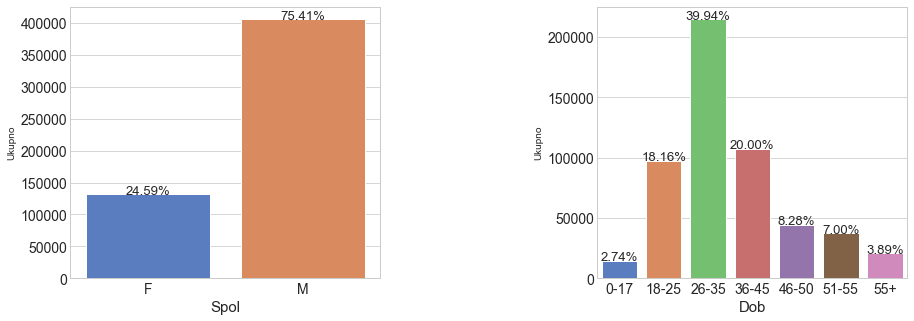

In [5]:
graf1, osovine1 = plt.subplots(1,2,figsize=(15,5))
graf1.subplots_adjust(hspace=0.7, wspace=0.7)

sns.set(font_scale=1.1)
sns.set_palette(sns.color_palette("muted"))

spol_graf = sns.countplot(skup_podataka['Gender'], ax=osovine1[0])
spol_graf.set_xlabel("Spol",fontsize=15)
spol_graf.set_ylabel("Ukupno")
spol_graf.tick_params(labelsize=14)
postotni_udio_elemenata(spol_graf,len(skup_podataka['Gender']))
    
dob_graf = sns.countplot(skup_podataka['Age'], ax=osovine1[1],
                         order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
dob_graf.set_xlabel("Dob",fontsize=15)
dob_graf.set_ylabel("Ukupno")
dob_graf.tick_params(labelsize=14)
postotni_udio_elemenata(dob_graf,len(skup_podataka['Age']))

Programski kod za kreiranje histograma koji brojeve i udjele kupaca prema bračnom stanju, kategroijama gradova te prema kategoriji godina na trenutnoj lokaciji. Grafkoni su istog tipa kao i prethodni.

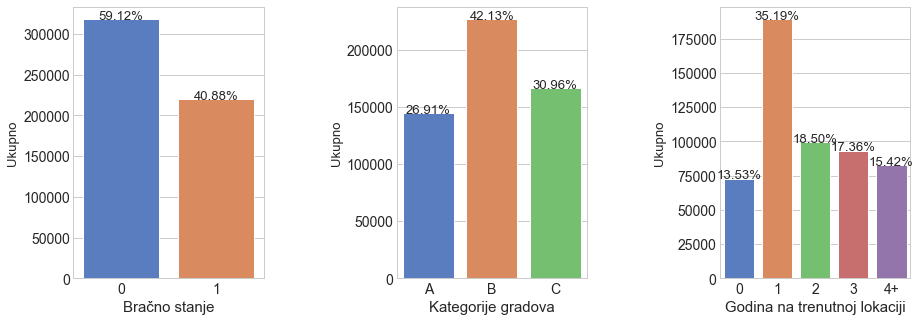

In [6]:
plt.style.use('seaborn-whitegrid')

graf2, osovine2 = plt.subplots(1,3,figsize=(15,5))
graf2.subplots_adjust(hspace=0.7, wspace=0.7)

sns.set(font_scale=1.1)
sns.set_palette(sns.color_palette("muted"))

bracnoStanje_graf = sns.countplot(skup_podataka['Marital_Status'], ax=osovine2[0])
bracnoStanje_graf.set_xlabel("Bračno stanje",fontsize=15)
bracnoStanje_graf.set_ylabel("Ukupno")
bracnoStanje_graf.tick_params(labelsize=14)
postotni_udio_elemenata(bracnoStanje_graf,len(skup_podataka['Marital_Status']))

gradovi_graf = sns.countplot(skup_podataka['City_Category'], ax=osovine2[1], order=['A', 'B', 'C'])
gradovi_graf.set_xlabel("Kategorije gradova",fontsize=15)
gradovi_graf.set_ylabel("Ukupno")
gradovi_graf.tick_params(labelsize=14)
postotni_udio_elemenata(gradovi_graf,len(skup_podataka['City_Category']))

godineUGradu_graf = sns.countplot(skup_podataka['Stay_In_Current_City_Years'], ax=osovine2[2], 
                                  order=['0', '1', '2', '3', '4+'])
godineUGradu_graf.set_xlabel("Godina na trenutnoj lokaciji",fontsize=15)
godineUGradu_graf.set_ylabel("Ukupno")
godineUGradu_graf.tick_params(labelsize=14)
postotni_udio_elemenata(godineUGradu_graf,len(skup_podataka['Stay_In_Current_City_Years']))

Sljedećim programskim kodom kreirana su dva *violin* grafikona (iz *seaborn* biblioteke) kojima se prikazuje distribucija prosječnog iznosa potrošnje u dva različita slučaja. Prvi grafikon prikazuje distribuciju potrošnje prema kategorijama gradova i prema spolovima a drugi prema dobnim kategorijama i bračnom stanju.

Oba grafikona su tipa *catplot* iz *seaborn* biblioteke.

<Figure size 864x864 with 0 Axes>

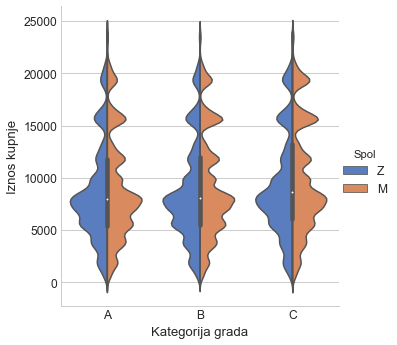

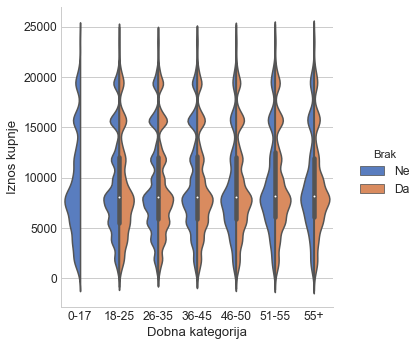

<Figure size 864x864 with 0 Axes>

In [7]:
plt.style.use('seaborn-whitegrid')
sns.set_palette(sns.color_palette("muted"))



gradoviKupovinaSpol_graf = sns.catplot(x='City_Category', y='Purchase',hue='Gender',split=True,
                                   data=skup_podataka, kind='violin', order=['A', 'B', 'C'])

gradoviKupovinaSpol_graf.set(xlabel='Kategorija grada', ylabel='Iznos kupnje')
gradoviKupovinaSpol_graf._legend.set_title("Spol")
oznake = ['Ž','M']
for tekst, oznaka in zip(gradoviKupovinaSpol_graf._legend.texts, oznake): tekst.set_text(oznaka)

    

godineZivljenjaDobBracnoStajne_graf = sns.catplot(x='Age', y='Purchase',
                                                  hue='Marital_Status',split=True,
                                                  data=skup_podataka, kind='violin',
                                                  order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

godineZivljenjaDobBracnoStajne_graf.set(xlabel='Dobna kategorija', ylabel='Iznos kupnje')
godineZivljenjaDobBracnoStajne_graf._legend.set_title("Brak")
oznake = ['Ne','Da']
for tekst, oznaka in zip(godineZivljenjaDobBracnoStajne_graf._legend.texts, oznake): tekst.set_text(oznaka)
    

plt.figure(figsize=(12,12))

Sljedeći programski isječak prikazuje kod za kreiranje kružng dijagrama kojim su prikazani udjeli zanimanja (*Occupation*) iz skupa. Za kreiranje dijagrama korištena je *pie* klasa iz *matplotlib* biblioteke.

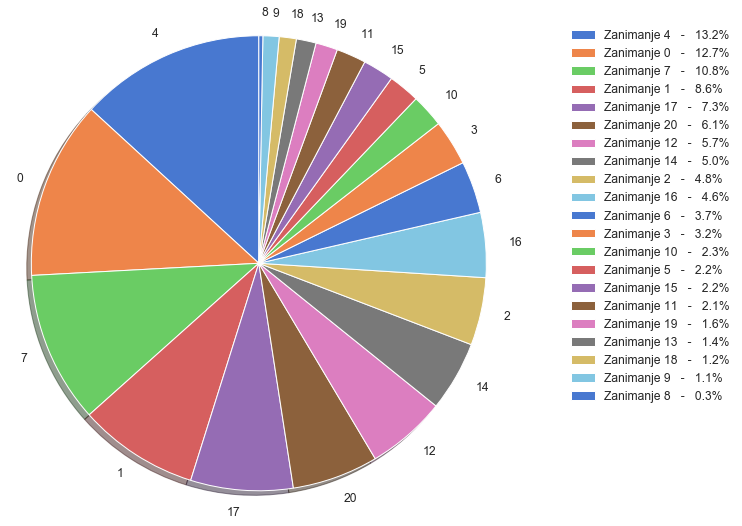

In [8]:
zanimanja = skup_podataka['Occupation'].unique()
ucestalost_zanimanja = skup_podataka['Occupation'].value_counts(dropna=False)
ucestalost_zanimanja = ucestalost_zanimanja.sort_values(ascending=False)

oznake = [z[0] for z in ucestalost_zanimanja.items()]

plt.figure(figsize=(9,9))
plt.pie(ucestalost_zanimanja, shadow=True, startangle=90, labels = oznake)

plt.axis('equal')
plt.legend(labels=[f'Zanimanje {x}   -   {np.round(y/(skup_podataka.shape[0])*100,1)}%' for x,y in ucestalost_zanimanja.items()], 
           bbox_to_anchor=(1.1,1))
plt.show()

## 4.3 Čišćenje i priprema podataka za samo-organizirajuću mapu

### 4.3.1 Odabir značajki

Sljedeći programski kod odstranjuje stupce 'Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3' te 'Purchase' kako bismo u skupu dobili samo podatke vezane uz demografiju kupaca. Kako bi skup sa odabranim atributima bio dobiven, željeni atributi mapirani su iz skupa podataka u zasebnu varijablu "skup_kupaca".

In [9]:
skup_kupaca = skup_podataka[['User_ID','Age', 'Gender','Occupation','Stay_In_Current_City_Years',
                                'Marital_Status','City_Category']]
skup_kupaca.head()

,User_ID,Age,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,City_Category
0,1000001,0-17,F,10,2,0,A
1,1000001,0-17,F,10,2,0,A
2,1000001,0-17,F,10,2,0,A
3,1000001,0-17,F,10,2,0,A
4,1000002,55+,M,16,4+,0,C


Nakon što su odstranjeni stupci koji nisu potrebni za daljnju analizu, slijedi korak izvlačenja jedinstvenih redaka iz skupa podataka. Odstranjivanje se obavlja koristeći *Pandas* metodu *drop_duplicates()* kojoj se kao parametar proslijeđuje 'inplace=True' kako bi nova instanca objekta *DataFrame* koja nastaje izvođenjem metode ostala pohranjena u varijabli 'skup_kupaca'.

In [10]:
skup_kupaca.drop_duplicates(inplace=True)

skup_kupaca.head()

,User_ID,Age,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,City_Category
0,1000001,0-17,F,10,2,0,A
4,1000002,55+,M,16,4+,0,C
5,1000003,26-35,M,15,3,0,A
6,1000004,46-50,M,7,2,1,B
9,1000005,26-35,M,20,1,1,A


Nakon odstranjivanja duplikata iz skupa preostaje još maknuti i identifikacijski broj kupca. Nakon micanja 'User_ID' kreira se mali *DataFrame* koji sadrži informacije o dimenzijama skupa kupaca. 

In [11]:
# Odstranjivanje User_ID stupca
skup_kupaca.drop(columns=['User_ID'], axis=1, inplace=True)

# Kreiranje tablice sa opisom skupa kupaca
opisPodataka = pd.DataFrame(columns=['Broj_redaka', 'Broj_stupaca'])
opisTablica = opisPodataka.append(pd.Series([skup_kupaca.shape[0], skup_kupaca.shape[1]],index=opisPodataka.columns),ignore_index=True)

opisTablica

,Broj_redaka,Broj_stupaca
0,5891,6




### 4.3.2 Standardizacija podataka


Pozivom *info()* metode nad skupom podataka možemo saznati od kojih se sve tipova podataka sastoji skup.

In [12]:
skup_kupaca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5891 entries, 0 to 243533
Data columns (total 6 columns):
Age                           5891 non-null object
Gender                        5891 non-null object
Occupation                    5891 non-null int64
Stay_In_Current_City_Years    5891 non-null object
Marital_Status                5891 non-null int64
City_Category                 5891 non-null object
dtypes: int64(2), object(4)
memory usage: 322.2+ KB


Prema informacijama sa prijašnjeg isječka moguće je kreirati sljedeći programski kod u kojem se svi atributi koji su tipa *object* konvertiraju prvo u tip *int64* a zatim u *float64* tip podatka, koji je pogodan za algoritme strojnog učenja.

Sljedeći programski kod koristi *LabelEncoder* klasu, iz *scikit-learn* Python modula, za pretvaranje kategoričkih i ostalih ne-numeričkih vrijednosti u numeričke vrijednosti. (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Prva *for* iteracija redom traži sve atribute tipa *object* u skupu te ih koristeći lEncoder objekt pretvara u numeričke vrijednosti. Kako se jedna instanca objekta lEncoder može koristiti samo za jedan atribut, različite instance lEncoder su pohranjene u listu 'enkoderi_lista', u obliku python strukture *tuple*, skupa sa imenom stupca čiju vrijednost konvertiraju. Ovaj korak je potreban kako bi se kasnije mogle vratiti vrijednosti u prvotni oblik.

Zatim druga iteracija traži sve atribute koji nisu tipa *float64* te ih pretvara u *float64* tip podatka. Ova konverzija se vrši zato da podaci budu pogodni za obradu Kohonenovom mapom.

In [13]:
from sklearn.preprocessing import LabelEncoder

enkoderi_lista = []

for stupac in skup_kupaca:
    if skup_kupaca[stupac].dtype == 'object':

        lEncoder = LabelEncoder()
        
        enkoderi_lista.append((lEncoder,stupac))

        skup_kupaca[stupac] = lEncoder.fit_transform(skup_kupaca[stupac])
    
        

for stupac in skup_kupaca:
    if skup_kupaca[stupac].dtype is not 'float64':
        skup_kupaca[stupac] = skup_kupaca[stupac].astype('float64')


skup_kupaca.head()

,Age,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,City_Category
0,0.0,0.0,10.0,2.0,0.0,0.0
4,6.0,1.0,16.0,4.0,0.0,2.0
5,2.0,1.0,15.0,3.0,0.0,0.0
6,4.0,1.0,7.0,2.0,1.0,1.0
9,2.0,1.0,20.0,1.0,1.0,0.0


Ako sada pogledamo vrijednosti u dobivenoj tablici, moguće je uočiti da su sve vrijednosti numeričke.

Programski kod u sljedećem isječku kreira grafikon na kojem su prikazane svih šest dimenzija skupa kupaca u tri dimenzije. Grafikon je napravljen koristeći *Axes3D* klasu iz *matplotlib* Python biblioteke.

Text(0.5, 0, 'Zanimanje')

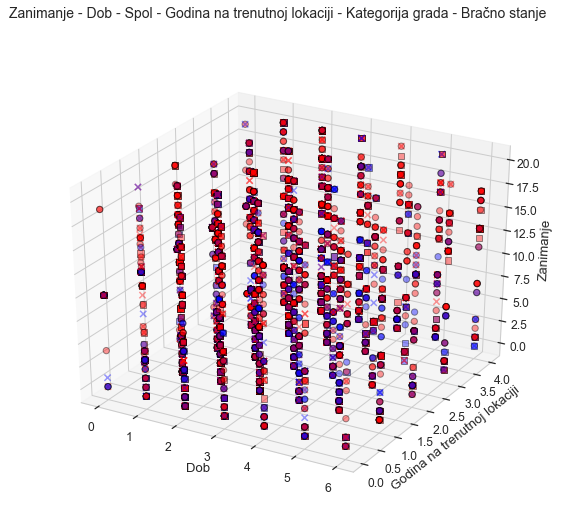

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

graf = plt.figure(figsize=(10, 8))
tekst = graf.suptitle('Zanimanje - Dob - Spol - Godina na trenutnoj lokaciji - Kategorija grada - Bračno stanje', fontsize=14)
osovina = graf.add_subplot(111, projection='3d')

xos = list(skup_kupaca['Age'])
yos = list(skup_kupaca['Stay_In_Current_City_Years'])
zos = list(skup_kupaca['Occupation'])
podaci = [(x, y, z) for x, y, z in zip(xos, yos, zos)]

ss = list(skup_kupaca['Marital_Status'])
boje = ['blue' if spol == 0.0 else 'red' for spol in list(skup_kupaca['Gender'])]
znakovi = [',' if kategorija == 0.0 else 'x' if kategorija == 1.0 else 'o' for kategorija in list(skup_kupaca['City_Category'])]

for pod, boja, velicina, ozn in zip(podaci, boje, ss, znakovi):
    x, y, z = pod
    osovina.scatter(x, y, z, alpha=0.4, c=boja, edgecolors='none', s=velicina, marker=ozn, sizes=(40,40))

osovina.set_xlabel('Dob')
osovina.set_ylabel('Godina na trenutnoj lokaciji')
osovina.set_zlabel('Zanimanje')

### 4.3.3 Skaliranje vrijednosti


Poslijednji korak u čišćenju podataka je skaliranje vrijednosti, za to će biti korištena *StandardScaler* klasa iz Python modula *scikit-learn* (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Pozivom klase *StandardScaler* kreiran je "scaler" objekt. Primjenom "scaler" objekta na skup kupaca dobiven je *numpy* niz sa skaliranim vrijednostima. Skalirane vrijednosti pohranjene su u varijablu 'kupci_vrijednosti'.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

kupci_vrijednosti = scaler.fit_transform(skup_kupaca)

kupci_vrijednosti[:2]

array([[-1.74758177, -1.59248686,  0.29208147,  0.11035958, -0.85089772,
        -1.77387042],
       [ 2.25384501,  0.62794867,  1.24105762,  1.67129183, -0.85089772,
         0.84350482]])

### 4.4 Primjena samo-organizirajuće mape na segmentaciju kupaca

### 4.4.1 Odabir hiper-parametara

Sljedeći programski isječak sadrži učitavanje *somoclu* modula, određivanje broja stupaca i redaka mreže te pravljenje oznaka prvih 100 kupaca u obliku Python liste.

In [16]:
import somoclu

broj_redaka = 66
broj_stupaca = 66

oznake_kupaca = []

for i in range(kupci_vrijednosti.shape[0]):
    if i < 100:
        oznake_kupaca.append(i)
    else:
        oznake_kupaca.append(None)

### 4.4.2 Treniranje samo-organizirajuće mape

U naredne dvije linije koda obavlja se modeliranje i treniranje samo-organizirajuće mape. Prvo se objekt tipa *Somoclu* instancira u varijablu "mapa" te se pri tome kao parametri prosljeđuju broj redaka, stupca i tip mape kakvu želimo (u ovom slučaju to je "toroid" tip). 

Zatim u drugoj liniji se izvršava treniranje kreirane mape koristeći *train()* metodu kojoj se prosljeđuju parametri: *numpy array* sa skaliranim podacima ("kupci_vrijednosti") i broj epoha (instanci) treniranja.

In [17]:
# mapa = somoclu.Somoclu(broj_redaka, broj_stupaca, maptype = 'toroid')
# mapa.train(data = kupci_vrijednosti, epochs=20)

Pozivom metode *view_umatrix()* dobiva se toplinski prikaz U-matrice.

Pohranjivanje treniranog modela u 'pickle' tip datoteke.

In [18]:
import pickle

# with open('trenirani_SOM_model.p', 'wb') as fajl:
#     pickle.dump(mapa, fajl)

Učitavanje trenirane mape iz 'pickle' datoteke.

In [19]:
with open('trenirani_SOM_model.p', 'rb') as fajl:
    mapa = pickle.load(fajl)

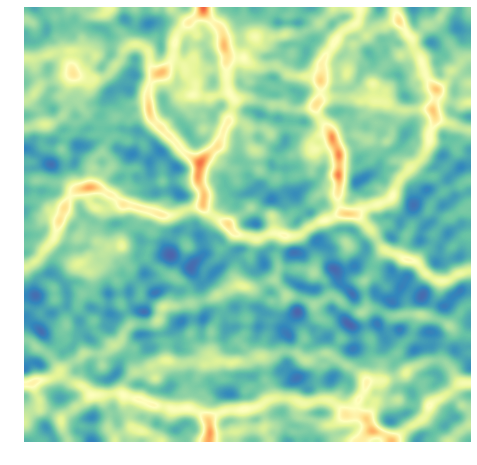

<module 'matplotlib.pyplot' from 'c:\\python\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [20]:
mapa.view_umatrix()

### 4.4.3 Analiza ravnina komponenti

Metodom *view_component_planes()* dobivaju se toplinske mape za svaki atribut (dimenziju) skupa.

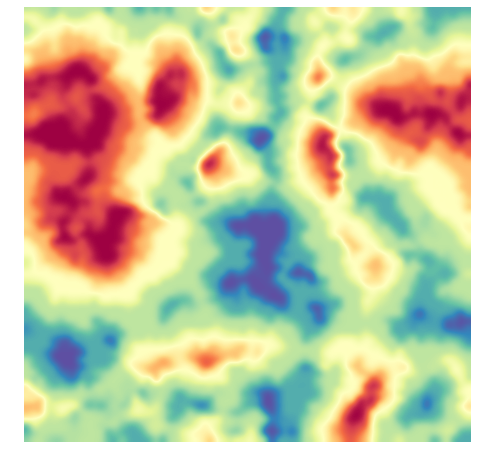

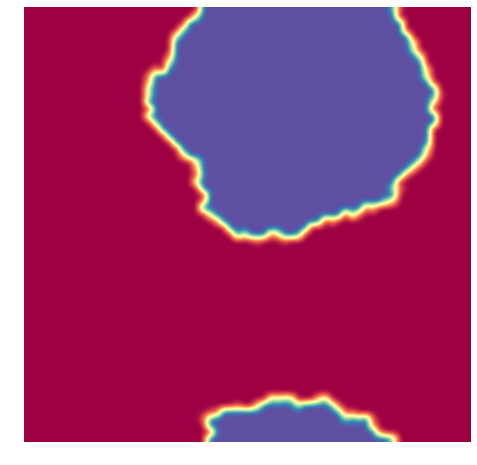

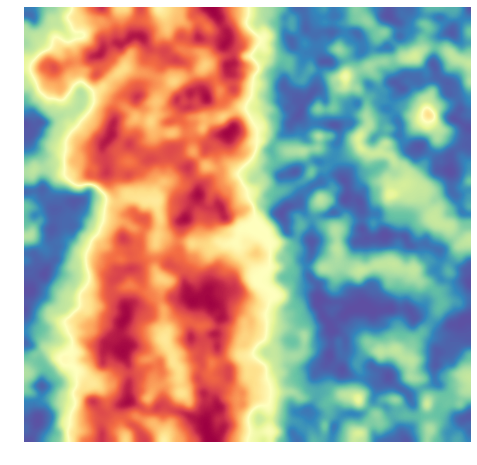

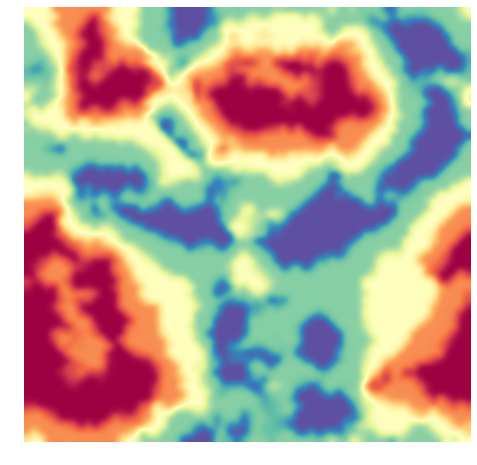

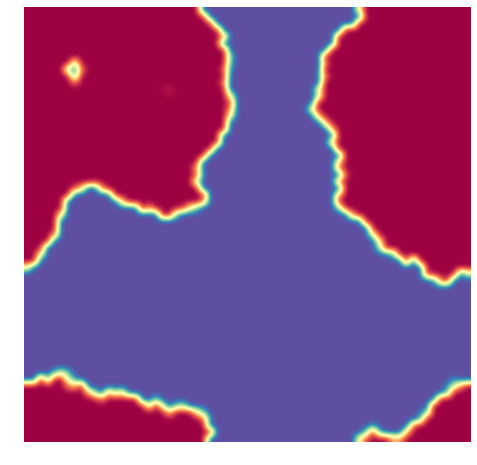

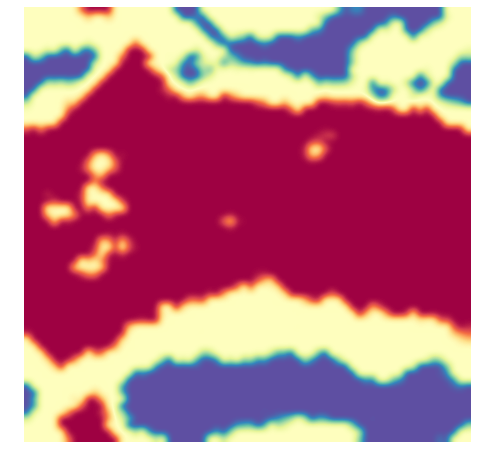

<module 'matplotlib.pyplot' from 'c:\\python\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [21]:
mapa.view_component_planes()

### 4.4.4 Određivanje broja kategorija


Učitavanje *KMeans* modela, *metrics* klase koja sadrži metode za određivanje točnoti modela te *cdist* klase (iz *scypy* biblioteka) za mjerenje udaljenosti u prostoru.

In [22]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

Sljedeći programski kod trenira 29 različitih modela *KMeans* algoritma te pri svakoj iteraciji računa točnost algoritma. U svakoj iteraciji broj kategorija se povećava za jedan. Na kraju se kreira *matplotlib* linijski grafikon koji prikzuje točnost modela s različitim inicjalnim brojem kategorija.

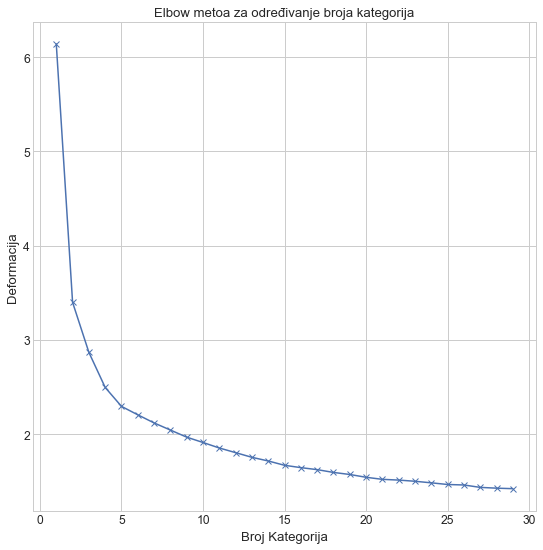

In [23]:
plt.figure(figsize=(9,9))
deformiranja = []

testiranih_kategorija = range(1,30)

for k in testiranih_kategorija:
    kmeanModel = KMeans(n_clusters=k).fit(skup_kupaca.values)
    kmeanModel.fit(skup_kupaca.values)
    deformiranja.append(sum(np.min(cdist(skup_kupaca.values, kmeanModel.cluster_centers_, 'euclidean'),
                                  axis=1)) / skup_kupaca.values.shape[0])


plt.plot(testiranih_kategorija, deformiranja, 'bx-', marker='x')
plt.xlabel('Broj Kategorija')
plt.ylabel('Deformacija')
plt.title('Elbow metoa za određivanje broja kategorija')


plt.show()

Ranije dobiveni rezultat određuje optimalan broj kategorija u koje će kupci biti kategorizirani. Sljedeći programski blok koristi *cluster()* metodu kako bi neurone trenirane mape podijelila u prosljeđeni broj kategorija (šest u ovom slučaju) koristeći *KMeans* algoritam.

Nakon kategoriziranja neurona ponovno se prikazuje U-matrica, ali ovaj put sa svim podacima prikazanim na mapi i oznakama prvih 100 kupaca. Svaka kategorija kupca je označena drugačijom bojom na slici.

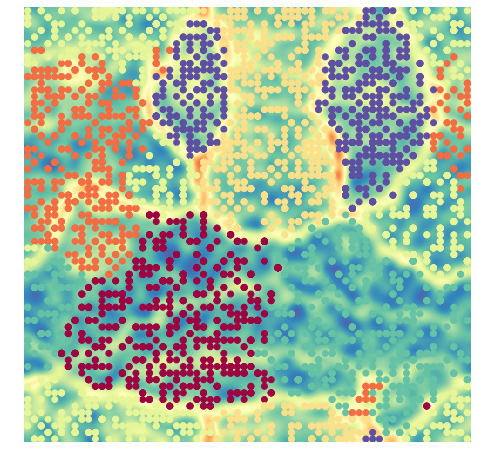

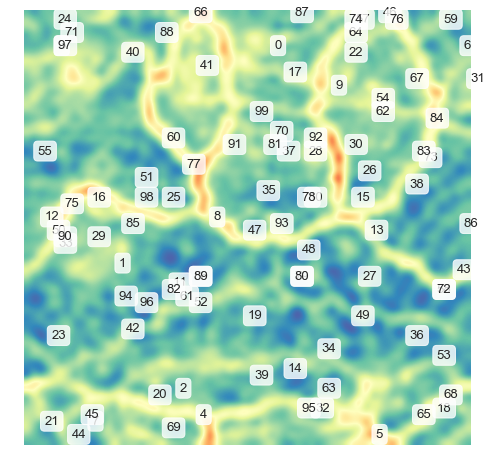

<module 'matplotlib.pyplot' from 'c:\\python\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [24]:
mapa.cluster(algorithm=KMeans(n_clusters=6))
mapa.view_umatrix(bestmatches=True)
mapa.view_umatrix(labels=oznake_kupaca)

Pohranjivanje broja kategorije za svakog člana niza 'kupci_vrijednosti' u listu naziva 'kategorije_lista'. Zatim, pretvaranje liste u objekt tipa *DataFrame* naziva 'kategorija'.

Broj kategorije svakog kupca dobiva se iz svojstva *clusters* *Somoclu* klase, tako da se kroz niz iteriraju BMUs sa rednim brojem kupca iz skaliranog skupa.

In [25]:
kategorije_lista = []

for kupac in range(kupci_vrijednosti.shape[0]):
    kategorije_lista.append(mapa.clusters[mapa.bmus[kupac,1],mapa.bmus[kupac,0]])

        
kategorija = pd.DataFrame(kategorije_lista)

## 4.5 Analiza dobivenih rezultata

Sljedeći dio programskog koda skupu kupaca pridodaje novi stupac naziva 'Kategorija_kupca' te u njega kopira broj kategorije u koji je Kohonenova mapa svrstala pojedinog kupca.

In [26]:
skup_kupaca.index = range(len(skup_kupaca.index))
skup_kupaca['Kategorija_kupca'] = kategorija

skup_kupaca.head()

,Age,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,City_Category,Kategorija_kupca
0,0.0,0.0,10.0,2.0,0.0,0.0,3
1,6.0,1.0,16.0,4.0,0.0,2.0,4
2,2.0,1.0,15.0,3.0,0.0,0.0,5
3,4.0,1.0,7.0,2.0,1.0,1.0,2
4,2.0,1.0,20.0,1.0,1.0,0.0,2


Pretvaranje svih stupaca skupa kupaca u tip podatka *int64*, kako bi bili pogodni za daljnju analizu.

In [27]:
for stupac in skup_kupaca:
    if skup_kupaca[stupac].dtype != 'int64':
        skup_kupaca[stupac] = skup_kupaca[stupac].astype('int64')
skup_kupaca.head()

,Age,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,City_Category,Kategorija_kupca
0,0,0,10,2,0,0,3
1,6,1,16,4,0,2,4
2,2,1,15,3,0,0,5
3,4,1,7,2,1,1,2
4,2,1,20,1,1,0,2


Kako bi dobiveni rezultati mogli biti smisleno interpretirani potrebno je vrijednosti atributa skup_kupaca pretvoriti natrag u originalne vrijednosti. Isječak ispod prikazuje uspoređivanje stupaca skupa i imena stupaca iz 'enkoderi_lista' (u kojoj su spremljene instance *LabelEncoder* klase i imena stupaca koje konvertiraju). Kad je pronađena konvertirana vrijednosti, ona se pretvara natrag u originalnu vrijednost koristeći *sklearn* metodu *inverse_transform()*

In [28]:
for element in enkoderi_lista:
    for stupac in skup_kupaca:
        enc, naziv = element
        if naziv == stupac:
            skup_kupaca[stupac] = enc.inverse_transform(skup_kupaca[stupac])

skup_kupaca.head()

,Age,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,City_Category,Kategorija_kupca
0,0-17,F,10,2,0,A,3
1,55+,M,16,4+,0,C,4
2,26-35,M,15,3,0,A,5
3,46-50,M,7,2,1,B,2
4,26-35,M,20,1,1,A,2


Odjeljivanje svih kupaca koji pripadaju različitim kategorijama u zasebne skupove. Svaka kategorija se pohranjuje u zaseban objekt tipa *DataFrame* za lakšu analizu koja slijedi, imena skupova su oblika "Skup_kupaca_N" gdje N predstavlja broj od 1 do 6.

In [29]:
Skup_kupaca1 = skup_kupaca.loc[skup_kupaca['Kategorija_kupca'] == 0]
Skup_kupaca2 = skup_kupaca.loc[skup_kupaca['Kategorija_kupca'] == 1]
Skup_kupaca3 = skup_kupaca.loc[skup_kupaca['Kategorija_kupca'] == 2]
Skup_kupaca4 = skup_kupaca.loc[skup_kupaca['Kategorija_kupca'] == 3]
Skup_kupaca5 = skup_kupaca.loc[skup_kupaca['Kategorija_kupca'] == 4]
Skup_kupaca6 = skup_kupaca.loc[skup_kupaca['Kategorija_kupca'] == 5]

Sljedeći programski kod sadrži definiciju metode "dob_spol_graf()" koja kreira *seaborn countplot* grafikon. Na grafikonu se nalazi broj kupaca prema dobnim kategorijama i spolu. Metoda je napravljena tako da kao parametar uzima jedan skup podataka. Na kraju programskog isječka metoda "dob_spol_graf()" pozvana je šest puta, svaki put sa drugim skupom kupaca kreianim u prijašnjem isječku, kako bi dobili isti grafikon za svaki skup.

posx and posy should be finite values
posx and posy should be finite values


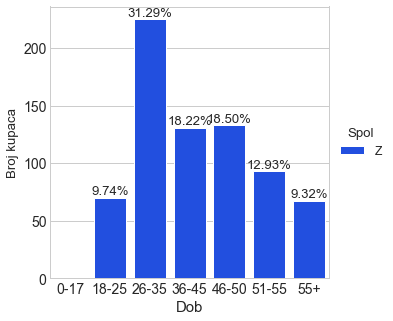

posx and posy should be finite values
posx and posy should be finite values


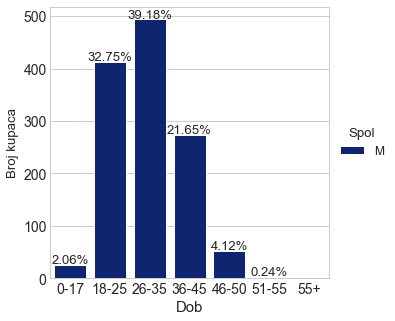

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


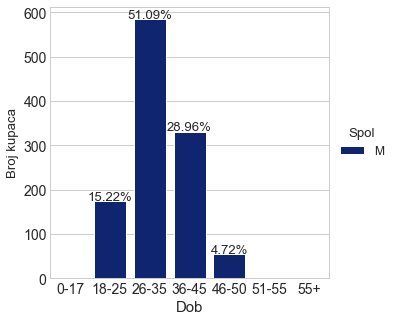

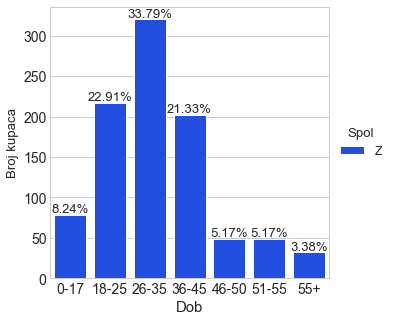

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


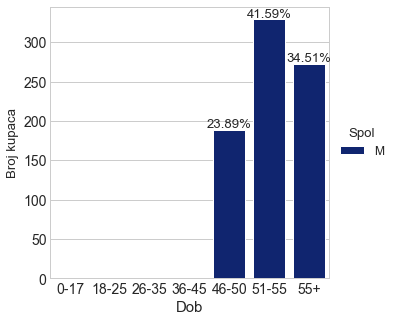

posx and posy should be finite values
posx and posy should be finite values


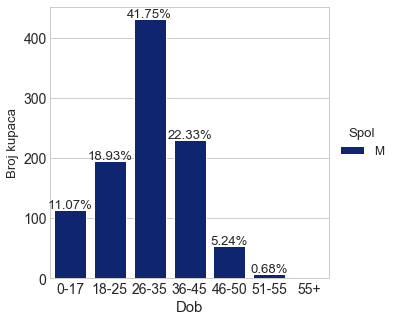

In [30]:
def dob_spol_graf(skup):
    
    if skup['Gender'].iloc[0] == "F":
        oznaka = "Ž"
        sns.set_palette(sns.color_palette("bright"))
    elif skup['Gender'].iloc[0] == "M":
        oznaka = "M"
        sns.set_palette(sns.color_palette("dark"))
    else:
        pass

    
    plt.figure(figsize=(5,5))
    
    graf = sns.countplot(skup['Age'],hue=skup['Gender'], 
                          order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
    
    graf.set_xlabel("Dob",fontsize=15)
    graf.set_ylabel("Broj kupaca")
    graf.tick_params(labelsize=14)
    
    
    postotni_udio_elemenata(graf,len(skup['Age']))
    
    plt.legend(title='Spol', loc='center left', bbox_to_anchor=(1, 0.5),labels=[oznaka])
    plt.show()
    
dob_spol_graf(Skup_kupaca1)
dob_spol_graf(Skup_kupaca2)
dob_spol_graf(Skup_kupaca3)
dob_spol_graf(Skup_kupaca4)
dob_spol_graf(Skup_kupaca5)
dob_spol_graf(Skup_kupaca6)

Metoda "godina_na_lokaciji_graf()" implementira prikaz histograma na kojem se nalazi broj i postotni udio kupaca prema kategoriji godina koliko žive na trenutnoj lokaciji. Isto kao kod prethodne metode, na kraju se metode poziva šest puta (svaki put sa drugim skupom kupaca) kako bi grafovi bili kreirani za svaki skup.

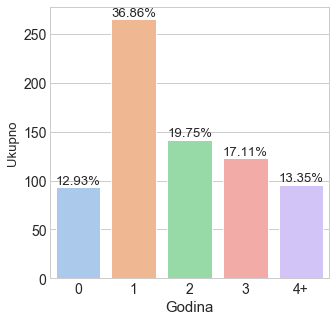

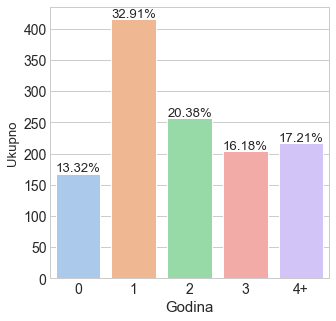

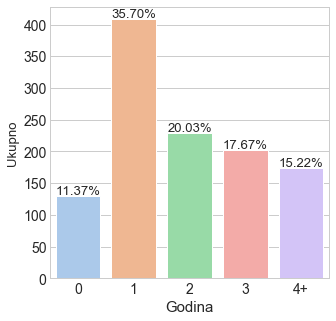

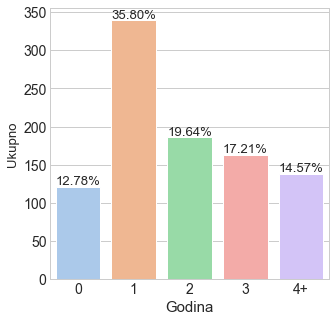

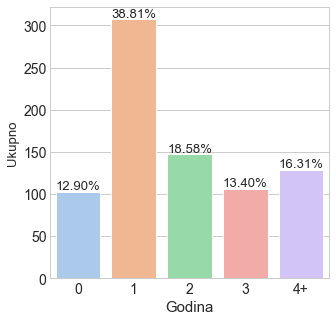

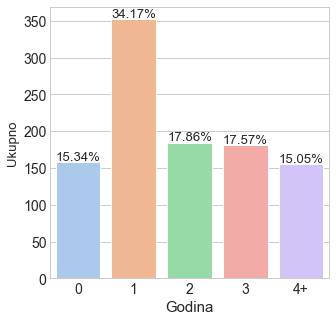

In [31]:
def godina_na_lokaciji_graf(skup):
    
    sns.set_palette(sns.color_palette("pastel"))
    
    plt.figure(figsize=(5,5))
    
    godinaNaLokaciji = sns.countplot(skup['Stay_In_Current_City_Years'],
                        order=['0','1','2','3','4+'])
    godinaNaLokaciji.set_xlabel("Godina",fontsize=15)
    godinaNaLokaciji.set_ylabel("Ukupno")
    godinaNaLokaciji.tick_params(labelsize=14)
    
    postotni_udio_elemenata(godinaNaLokaciji,len(skup['Stay_In_Current_City_Years']))
    
    plt.show()

godina_na_lokaciji_graf(Skup_kupaca1)
godina_na_lokaciji_graf(Skup_kupaca2)
godina_na_lokaciji_graf(Skup_kupaca3)
godina_na_lokaciji_graf(Skup_kupaca4)
godina_na_lokaciji_graf(Skup_kupaca5)
godina_na_lokaciji_graf(Skup_kupaca6)

Metoda "grad_bracnoStanje_graf()" kreira histogram kojim se prikazuje broj i postotni udio kupaca u kategorijama gradova i bračnom stanju. Na kraju je metoda pozvana šest puta, za svaki skup kupaca jednom.

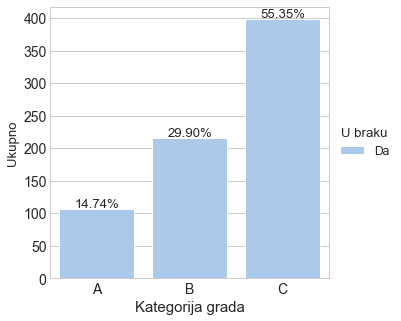

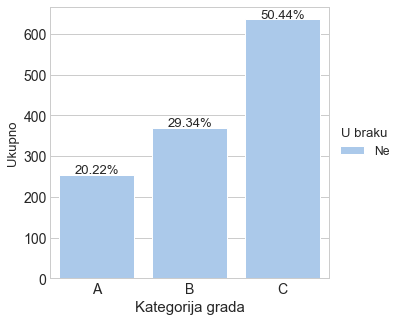

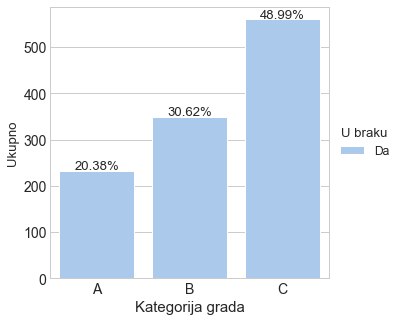

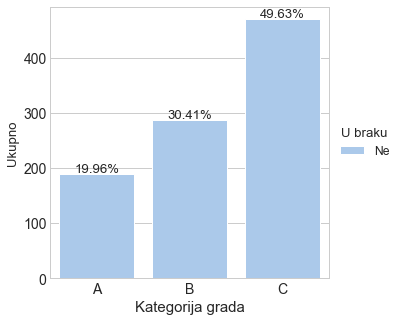

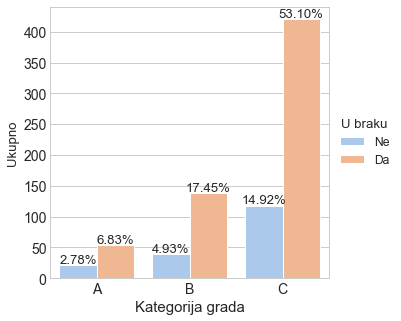

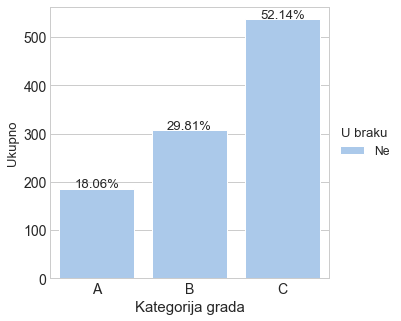

In [32]:
def grad_bracnoStanje_graf(skup):
    
    plt.figure(figsize=(5,5))
    
    sns.set_palette(sns.color_palette("pastel"))
    
    graf = sns.countplot(skup['City_Category'],hue=skup['Marital_Status'], 
                          order=['A','B','C'])
    
    graf.set_xlabel("Kategorija grada",fontsize=15)
    graf.set_ylabel("Ukupno")
    graf.tick_params(labelsize=14)
    
    postotni_udio_elemenata(graf,len(skup['City_Category']))
    
    if len(skup['Marital_Status'].unique()) == 1 and skup['Marital_Status'].unique()[0] == 0:
        plt.legend(title='U braku',loc='center left', bbox_to_anchor=(1, 0.5), labels=['Ne'])
    elif len(skup['Marital_Status'].unique()) == 1 and skup['Marital_Status'].unique()[0] == 1:
        plt.legend(title='U braku',loc='center left', bbox_to_anchor=(1, 0.5), labels=['Da'])
    else:
        plt.legend(title='U braku',loc='center left', bbox_to_anchor=(1, 0.5), labels=['Ne','Da'])
    
    plt.show()
    
grad_bracnoStanje_graf(Skup_kupaca1)
grad_bracnoStanje_graf(Skup_kupaca2)
grad_bracnoStanje_graf(Skup_kupaca3)
grad_bracnoStanje_graf(Skup_kupaca4)
grad_bracnoStanje_graf(Skup_kupaca5)
grad_bracnoStanje_graf(Skup_kupaca6)

Metoda "zanimanja_graf()" kreira višeslojni linijski grafikon koristeći *seaborn.FaceGrid* klasu. Grafikon je napravljen tako da se na svakoj razini nalazi distribucija udjela zanimanja za određenu kategoriju. Na osi apscisa nalaze se identifikacijski brojevi zanimanja (0-20). Za razliku od prijašnjih grafikona, ovdje se na jednom grafikonu nalaze podaci za svih šest kategorija.

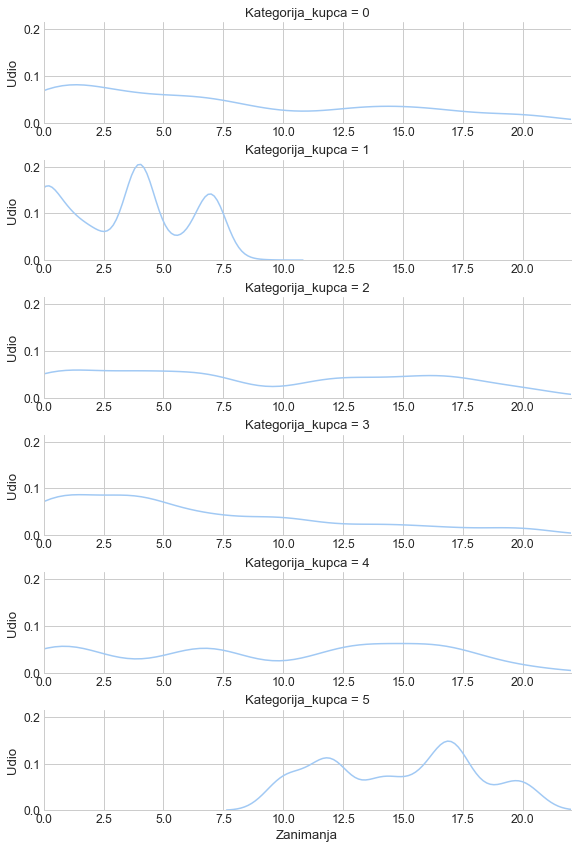

In [33]:
def zanimanja_graf(skup):
    
    graf = sns.FacetGrid(skup, row="Kategorija_kupca", height=2,aspect=4,xlim=(0,22))
    graf.map(sns.kdeplot, "Occupation")
    
    graf.set_axis_labels("Zanimanja", "Udio")
    
    for xos in graf.axes.flatten():
        xos.tick_params(labelbottom=True)

zanimanja_graf(skup_kupaca)

## 4.6 Primjeri predviđanja za nove i postojeće kupce

### Predviđanje za postojeće kupce


Kako bi na raspolaganju bili i podaci iz originalnog skupa podataka (u poglavlju 2.1 su bili izbačeni stupci koji nisu bili potrebni za segmentaciju klijenata) potrebno ih je objedinit s novostečenim podacima (kategorijama kupaca).

Naredni programski isječak dodaje kategorije kupaca kao novi stupac u originalni skup podataka.

In [34]:
kupci = pd.Series(skup_podataka['User_ID'].unique())

skup_kupaca['User_ID'] = kupci.astype('int64')

sk = skup_kupaca[['User_ID','Kategorija_kupca']]

skup_podataka = skup_podataka.join(sk.set_index('User_ID'), on='User_ID')

Iako Pandas modul podržava pravljenje jednostavnih upita nad podacima koristeći ugrađene funckije, u ovom radu za tu svrhu biti će korištena ugrađena Python sqllite3 biblioteka. Na taj način je moguće pisati SQL upite nad podacima što uvelike olakšava postupak odabira željenog podskupa podataka.

Nakon učitavanja sqlite3 biblioteke, potrebno je stvoriti poveznicu na bazu podataka te zatim pohraniti skup podataka iz Pandas DataFrame objekta u bazu podataka. Za pohranu u bazu koristi se ugrađena to_sql() metoda koja prima parametre ime tablice i poveznica na bazu podataka. Datoteka koja sadrži bazu podataka na disku zove se "skup_podataka.sqlite". Datoteka sa bazom podataka se može pronaći na Github stranici ovoga rada. (GITHUB LINK NA SQLITE FILE)

In [35]:
import sqlite3

bp = sqlite3.connect('skup_podataka.sqlite')
skup_podataka.to_sql('Kupci',bp)

c = bp.cursor()

SQL upit pohranjuje se u varijablu kao *string* tip podatka i pritom sve SQL ključne riječi moraju biti pisane velikim slovima. Za izvršavanje upita koristi se *Pandas* ugrađena metoda *read_sql_query()* koja kao parametar prima SQL upit i konekciju na bazu podataka te vraća rezultat upita u obliku *DataFrame* objekta.

Sljedeći programski blok sadrži *for* iteraciju unutar koje se vrši pretraga svih iznosa kupnje iz dane kategorije i prebrojavanje svih kupaca iz iste kategorije. Ti podaci se dijele (ukupan iznos kupnje podijeljen s brojem kupaca) te pohranjuju u listu "prosjecna_potr".

In [36]:
prosjecna_potr = []

for kategorija in range(len(skup_podataka['Kategorija_kupca'].unique())):
    upit1 = f'''SELECT Purchase FROM Kupci WHERE Kategorija_kupca={kategorija};'''
    rez1 = pd.read_sql_query(upit1,bp)
    iznos = rez1['Purchase'].sum()
    
    upit2 = f'''SELECT DISTINCT(User_ID) FROM Kupci WHERE Kategorija_kupca={kategorija};'''
    rez2 = pd.read_sql_query(upit2,bp)
    kupci = rez2['User_ID'].count()
    
    prosjecna_potr.append(iznos/kupci)

In [37]:
prosjecna_potr

[682626.2920723227,
 988186.1419508327,
 979502.2213473315,
 711526.6282998944,
 708262.8659924146,
 900130.7436893204]

U sljedećem programskom isječku kreiran je kružni dijagram kojim se prikazuje udio potrošnje svake kategorije kupaca. Dijagram je kreiran prema vrijednostima dobivenim u prijašnjem isječku.

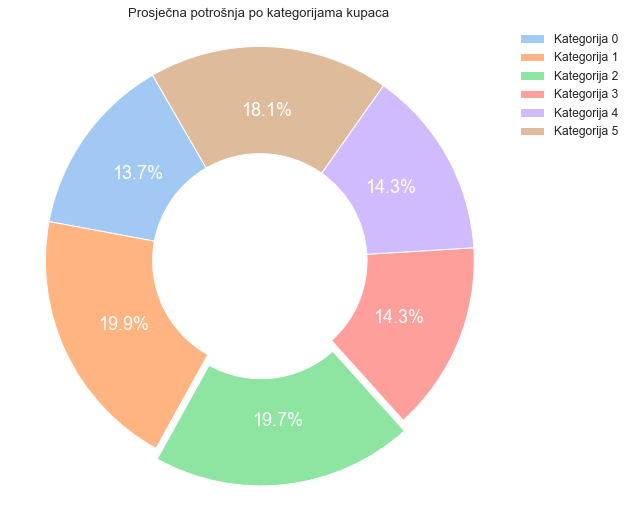

In [38]:
kategorije = skup_podataka['Kategorija_kupca'].unique()
kategorije = np.sort(kategorije)

# Veličina grafikona.
plt.figure(figsize=(9,9))

# Zadnji element će biti izdvojen.
izdvoji = (0,0,0.05,0,0,0)

odjeci, tekst, autotekst = plt.pie(prosjecna_potr, wedgeprops=dict(width=0.5), startangle=120, explode=izdvoji,
        autopct='%1.1f%%', pctdistance=0.7, textprops={'fontsize': 18})

# Mijenjanje boje labela unutar grafa.
for at in autotekst:
    at.set_color('white')
    
plt.axis('equal')

plt.title('Prosječna potrošnja po kategorijama kupaca')
plt.legend(labels=[f'Kategorija {k} 'for k in kategorije],
           bbox_to_anchor=(1, 0, 0.1, 1))
plt.show()

In [39]:
Skup_kupaca4.shape

(947, 7)

Upit na sljedećem isječku kao rezultat vraća pet najprodavanijih proizvoda koje su kupovali kupci iz kategorije šest.

In [40]:
upit3 = '''SELECT COUNT(Product_ID) AS Ukupno_proizvoda, Product_ID AS Proizvod
           FROM Kupci WHERE Kategorija_kupca=2 GROUP BY Product_ID ORDER BY Ukupno_proizvoda DESC;'''
kat_proiz = pd.read_sql_query(upit3,bp)
kat_proiz.head()

,Ukupno_proizvoda,Proizvod
0,387,P00265242
1,352,P00110742
2,344,P00112142
3,339,P00025442
4,339,P00057642


U *for* iteraciji u sljedećem isječku iteriraju se svi prozvodi koje su kupili kupci iz kategorije šest. Proizvodi koji su jedinstveni za tu kategoriju spremaju se u listu "jedinstveni_proizvodi".

In [41]:
upit4 = '''CREATE TABLE proizvodi_kategorije AS SELECT DISTINCT Product_ID, Kategorija_kupca FROM Kupci;'''
pd.read_sql_query(upit4,bp)

TypeError: 'NoneType' object is not iterable

In [42]:
jedinstveni_proizvodi = pd.DataFrame()

for proizvod in skup_podataka['Product_ID'].unique():
    
    upit5 = f'''SELECT DISTINCT(Kategorija_kupca), Product_ID as Proizvod FROM proizvodi_kategorije WHERE Product_ID ="{proizvod}";'''
    
    proiz_DF = pd.read_sql_query(upit5,bp)
    
    if proiz_DF.shape[0] == 1 and proiz_DF['Kategorija_kupca'].item() == 2:
        jedinstveni_proizvodi = jedinstveni_proizvodi.append(proiz_DF)

In [43]:
jedinstveni_proizvodi.reset_index(inplace=True, drop=True)
print("Jedinstvenih proizvoda u kategoriji 6:",jedinstveni_proizvodi.shape[0])
jedinstveni_proizvodi.head()

Jedinstvenih proizvoda u kategoriji 6: 48


,Kategorija_kupca,Proizvod
0,2,P00056542
1,2,P00054442
2,2,P00054842
3,2,P00275042
4,2,P00358542


### Predviđanje za nove kupca (*KNN* klasifikatorom)

Jednom kad su kupci označeni (eng. *labeled*) odnosno kad spadaju u neku mjerljivu kategoriju, vrlo je lako iskoristiti jedan od brojnih algoritama klasificiranja za određivanje kategorije novog kupca. Za te potrebe se u ovom radu koristi 

Koraci koji će biti provedeni:

**1.** Standardizacija i skaliranje podataka

**2.** Određivanje optimalnog broja susjeda

**3.** Treniranje modela

**4.** Predviđanje za novog kupca

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

Kod gdje se primjenjuje *LabelEncoder* klasa je isti kao i u prijašnjem slučaju, iz poglavlja 2.2.

In [45]:
enkoderi_lista = []

for stupac in skup_kupaca:
    if skup_kupaca[stupac].dtype == 'object':

        lEncoder = LabelEncoder()
        
        enkoderi_lista.append((lEncoder,stupac))

        skup_kupaca[stupac] = lEncoder.fit_transform(skup_kupaca[stupac])
    
for stupac in skup_kupaca:
    if skup_kupaca[stupac].dtype is not 'float64':
        skup_kupaca[stupac] = skup_kupaca[stupac].astype('float64')

skup_kupaca = skup_kupaca.loc[:,skup_kupaca.columns != 'User_ID']
skup_kupaca.head()

,Age,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,City_Category,Kategorija_kupca
0,0.0,0.0,10.0,2.0,0.0,0.0,3.0
1,6.0,1.0,16.0,4.0,0.0,2.0,4.0
2,2.0,1.0,15.0,3.0,0.0,0.0,5.0
3,4.0,1.0,7.0,2.0,1.0,1.0,2.0
4,2.0,1.0,20.0,1.0,1.0,0.0,2.0


Skaliranje podataka odvija se na isti način kao prije.

In [46]:
scaler = StandardScaler()

oznake = skup_kupaca['Kategorija_kupca'].values
znacajke = skup_kupaca.loc[:,skup_kupaca.columns != 'Kategorija_kupca']
znacajke = znacajke.loc[:,znacajke.columns != 'User_ID']
znacajke = scaler.fit_transform(znacajke)

Sljedeći korak nije bio potreban prilikom pripreme podataka za Kohonenovu mapu, a to je korak odjeljivanja podataka za treniranje od podataka za testiranje. Ovaj korak je specifičan za *supervised* algoritme strojnog učenja. Korištenjem *sklearn* metode *train_test_split()* značajke i oznake podataka dijele se u omjeru 80:20 te se pohranjuju u četiri varijable.

In [47]:
znacajke_tren, znacajke_test, oznake_tren, oznake_test = train_test_split(znacajke,oznake,test_size=0.2, random_state=42)

Naredni programski blok sadrži implementaciju određivanja optimalnog broja susjeda pri postupku klasificiranja. Unutar *for* iteracije, *KNN* algoritam se trenira zadan broj puta (29 u ovom slučaju) te radi predviđanja i pohranjuje točnost u listu "rezultati_lista".

In [48]:
broj_susjeda = range(1,30)

rezultati = {}
rezultati_lista = []

for k in broj_susjeda:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(znacajke_tren, oznake_tren)
    predvidanje = knn.predict(znacajke_test)
    rezultati[k] = metrics.accuracy_score(oznake_test, predvidanje)
    rezultati_lista.append(metrics.accuracy_score(oznake_test, predvidanje))

Linijski dijagram koji prikazuje točnost modela kroz iteracije povećanja broja susjeda. Iz grafikona se može vidjeti da je pet optimalan broj susjeda, sa čak 99& točnosti.

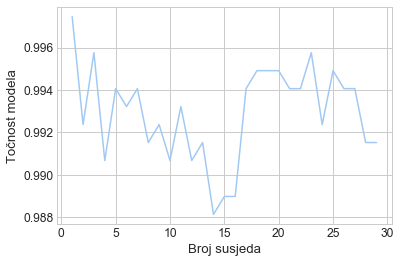

In [49]:
plt.plot(broj_susjeda,rezultati_lista)
plt.xlabel('Broj susjeda')
plt.ylabel('Točnost modela')

plt.show()

Treniranje modela. *KNeighborsClassifier* objekt iz *sklearn* modula pohranjuje se u varijablu "knn_model" te mu se pri instanciranju prosljeđuje parametar "broj susjeda".

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(znacajke,oznake)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

Pohranjivanje treniranog *KNN* modela na disk u *pickle* formatu.

In [51]:
with open('trenirani_KNN_model.p', 'wb') as f:
    pickle.dump(knn_model, f)

Kreiranje novog kupca u obliku *numpy.array*-a. Niz se populira s nasumično odabranim vrijednostima, zatim se ponovno primjernjuje standardizacija i skaliranje kako bi novi niz bio pogodan za klasificiranje *KNN* algoritmom.

In [54]:
novi_kupci = np.asarray([['0-17','M','17','A','1','1']])

le = LabelEncoder()

novi_kupci = le.fit_transform(novi_kupci[0])
novi_kupci = novi_kupci.reshape(1,-1)
novi_kupci = scaler.transform(novi_kupci)

U Python rječnik (eng. *dictionary*) pohranjene su, u obliku ključeva rječnika, oznake svake klase. A kao vrijednosti rječnika služe imena kategorija.

Na kraju, u varijablu "predviđanje" pohranjuje se predviđanje modela za novog kupca te ispod programskog isječka slijedi ispis rezultata.

In [55]:
klase = {0: "Kategorija 1",1: "Kategorija 2",2: "Kategorija 3", 3: "Kategorija 4", 4: "Kategorija 5", 5: "Kategorija 6"}
predvidanje = knn_model.predict(novi_kupci)
klase[predvidanje[0]]

'Kategorija 3'